# Arduino in IPython

## Import the Libraries

In [ ]:
import serial
import os, sys, time
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

## IPython3 Version (Slightly embellished)

In [2]:
def badAngle(angle):
    if angle < 30:
        print('BADDD ANGLEEE')
        return True
    return False

* The code was slightly embellished with the use of clear_output(), and stdout.flush() found in the 
animation example in the official IPython Notebook [Example Collection](https://github.com/ipython/ipython/tree/master/examples/notebooks).

In [3]:
dev = '/dev/cu.usbmodem3018921'

ser = serial.Serial(dev, 115200, timeout = 0.001) # Establish the connection on a specific port
sleep(1)     # The Arduino needs 5 seconds to wake up unless the code is uploaded as hex.
sys.stdout.flush() # This forces the output to the screen (avoid delays)
ser.flush() 

In [113]:
ser.flush()
ser.write(b'r\n')

2

In [114]:
data = np.zeros((3000,1))

# Start encoder readings, put into running node
ser.write(b'e\n');
sleep(0.005);
ser.write(b'b\n')
sleep(0.005);

ser.flush()
sys.stdout.flush() # This forces the output to the screen (avoid delays)



# Phase 0
# Send initial 180 deg command and wait to settle
ser.write('G1 X180.0 P0.10 D0.001'.encode('utf-8'))
# sleep(0.5);

# Phase 1: 0 - 500 ms:    Wait 500ms at 180 deg
# Phase 2: 500 - 1000ms:  Wait 500ms at 90 deg
# Phase 3: 1000 - 1500ms: Wait 500ms at 180 deg for settling (DO I NEED THIS)

phase1 = True
phase2 = False
phase3 = False

ser.flush()
sys.stdout.flush() # This forces the output to the screen (avoid delays)

while(ser.read() != b'\n'):
    pass

index = 0
message_string = ''

start_time = time.time()*1000

while phase1 or phase2 or phase3:
    now = time.time()*1000
    
    # Phase 2 transition
    if now - start_time > 500 and phase1:
        ser.write('G1 X90.0 P0.10 D0.001'.encode('utf-8'))
        phase1 = False
        phase2 = True
        phase3 = False
    # Phase 3 transition  
    if now - start_time > 1000 and phase2:
        # Enter phase 3
        ser.write('G1 X180.0 P0.10 D0.001'.encode('utf-8'))
        phase1 = False
        phase2 = False
        phase3 = True
    
    # Exit transition
    if now - start_time > 1500:
        phase1 = False
        phase2 = False
        phase3 = False
        break
    
    if ser.inWaiting() > 0:
        raw = ser.read()
        
        in_byte = raw.decode("utf-8") 
#         print(raw)
        
        if in_byte == '\n':
            # handle line data
            print('Message: ' + message_string + ' ' + str(len(message_string)), sep = '',end = '')
            try:
                angle = float(message_string)
                print(' Angle: ' + str(angle))
                if badAngle(angle):
                    data[index] = data[index-1]
                else:
                    data[index] = angle
                index += 1
                print(index)
                print(now - start_time)
            except:
                print(' Not float: ' + message_string)
                pass
            # reset message_string
            message_string = ''
        else:
            if in_byte != '\r':
                message_string += in_byte
        

# Exit stage
# Stop encoder readings
sleep(0.01)
ser.write(b'!e\n')
sleep(0.01)
# Put into ESTOp
ser.write(b's\n')
print("Done")

Message: 180.92 6 Angle: 180.92
1
0.430908203125
Message: 180.83 6 Angle: 180.83
2
1.306884765625
Message: 180.90 6 Angle: 180.9
3
1.686767578125
Message: 180.90 6 Angle: 180.9
4
2.718994140625
Message: 180.92 6 Angle: 180.92
5
3.171875
Message: 180.94 6 Angle: 180.94
6
3.885986328125
Message: 180.90 6 Angle: 180.9
7
4.427001953125
Message: 180.92 6 Angle: 180.92
8
4.976806640625
Message: 180.90 6 Angle: 180.9
9
5.447998046875
Message: 180.87 6 Angle: 180.87
10
6.0869140625
Message: 180.85 6 Angle: 180.85
11
6.79296875
Message: 180.87 6 Angle: 180.87
12
7.85791015625
Message: 180.85 6 Angle: 180.85
13
9.10791015625
Message: 180.83 6 Angle: 180.83
14
9.77685546875
Message: 180.87 6 Angle: 180.87
15
10.27490234375
Message: 180.81 6 Angle: 180.81
16
10.845947265625
Message: 180.81 6 Angle: 180.81
17
11.52294921875
Message: 180.87 6 Angle: 180.87
18
12.396728515625
Message: 180.85 6 Angle: 180.85
19
12.962646484375
Message: 180.83 6 Angle: 180.83
20
13.611083984375
Message: 180.83 6 Angle:

In [110]:
ser.write(b's\n')

2

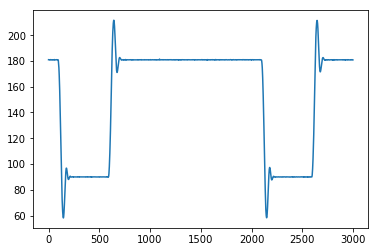

In [111]:
plt.plot(data)
plt.show()

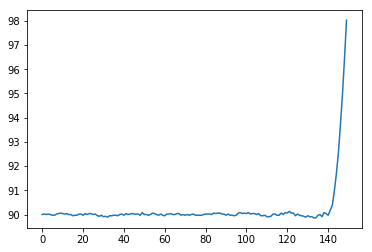

In [112]:
plt.plot(data[450:600])
plt.show()

In [11]:
data

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])